**Author: Shuchita Mishra**

**Email: mishra.shu@northeastern.edu**

### Problem Statement

An Accountable Care Organization (ACO) has engaged us to assist in helping them develop a predictive modeling solution to reduce the prevalence of strokes in the population they manage. Their plan is to develop an outreach program where a team of health coaches will work with members to reduce their risk of stroke. However, they do not have enough resources to engage every member of their population. Therefore, they would like us to develop a model that can be used to match the health coaches with those individuals who have the highest risk of stroke. To solve this problem, we would like you to first build a generalized linear model (GLM). If time permits, we would then like you to try to build a more advanced model to compete with the benchmark performance of your GLM. We are interested to see both the difference in performance and your thoughts on any important advantages or disadvantages to either method.

>> My approach in a nutshell

  - Main goal of the project : To develop a predictive model to identify the individuals with the highest risk of stroke, using a generalized linear model (GLM) that is suitable for binary classification problems. 

  - Target : In this case, the outcome variable is stroke, which is either 0 (no stroke) or 1 (stroke).

  - Approach : 

    - Step 1 : I start by **reading** in the dataset, **exploring** the dataset and **preprocessing** it to prepare it for modeling. To do this, I perform tasks such as handling missing values, encoding categorical variables, and scaling numerical variables. *Tools used were pandas (read_csv(), head(), shape(), info(), describe(), isnull(), fillna(), value_counts(), etc.)*

    - Step 2 : Once I have a clean dataset, I proceed to **visualize** the relationships between variables to perform **feature selection** using chi2 hypothesis tests. *Tools and plots used include matplotlib, seaborn, statsmodel.graphics, histograms, boxplots, correlation heatmaps, etc.  *
    
    - Step 3 : I then proceed to **split the data** into training and testing sets, and then **train a GLM** using the training set (using both, the glm package from statsmodel and my logistic regression code from scratch). The GLM will use the suitable features, such as age, heart_disease, hypertension, and metric_1, to predict the stroke outcome. I then **evaluate the performance** of the model on the testing set, using metrics such as accuracy, precision, recall, and F1 score. *Tools used were sklearn, statsmodel, numpy, StandardScaler, accuracy_score, confusion_matrix, classification_report, cohen_kappa_score, etc.*

    - Step 4 : As a part of additional work, I also tried to explore more advanced modeling techniques, such as **random forests, KNN classification, XGBoost, and neural networks**. I also performed **hyperparameter tuning** to improve the performance of the classifier from the benchmark GLM.



As a first step, I have imported the necessary libraries (pandas, seaborn, sklearn) which will be used in the assignment. 
Although I am comfortable with both, seaborn and matplotlib for visualizations, I have used seaborn predominantly since it is more flexible and customizable to work with.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.api as stats
import math
import scipy
from pprint import pprint
from csv import reader
from math import sqrt
# from scipy import statistics
from scipy.stats import mode
from scipy.stats import chi2 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from tensorflow.keras.layers import BatchNormalization
from keras.api._v2.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Reading Data and exploratory analysis

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/stroke data.csv')
print("The dataset has ",data.shape[0]," rows and ", data.shape[1], " columns.")

The dataset has  43400  rows and  15  columns.


In [ ]:
data.head(20)

,id,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke
0,1,Male,3.0,No,0,0,A,Rural,95.12,18.0,1,99.35,95.12,NaN,0
1,2,Male,58.0,Yes,1,0,B,Urban,87.96,39.2,1,99.70,87.96,never smoked,0
2,3,Female,8.0,No,0,0,B,Urban,110.89,17.6,0,96.35,110.89,NaN,0
3,4,Female,70.0,Yes,0,0,B,Rural,69.04,35.9,0,95.52,69.04,formerly smoked,0
4,5,Male,14.0,No,0,0,C,Rural,161.28,19.1,1,95.10,161.28,NaN,0
5,6,Female,47.0,Yes,0,0,B,Urban,210.95,50.1,0,97.63,210.95,NaN,0
6,7,Female,52.0,Yes,0,0,B,Urban,77.59,17.7,1,96.46,77.59,formerly smoked,0
7,8,Female,75.0,Yes,0,1,D,Rural,243.53,27.0,1,98.47,243.53,never smoked,0
8,9,Female,32.0,Yes,0,0,B,Rural,77.67,32.3,0,99.70,77.67,smokes,0
9,10,Female,74.0,Yes,1,0,D,Urban,205.84,54.6,0,96.37,205.84,never smoked,0


Some basic assumptions I have made on the data:

   - `id` : Basically this is just the index column which pandas adds by default so I have chosen to drop this colum
   - `gender` : I see only two values (Female/Male) however, I am sure there must be some other values too (More on this, down below)
   - `age` : The values that I see above are pretty normal and I expect them to be in the range 1-100 (although I am doubtful I would see any one year olds or 100 year old individuals in real world data)
   - `married` : I see only two values (Yes/No) and I assume they indicate if the individual is married or not
   - `hypertension` : Again, I see only two values (0/1) and I assume this indicates if the inidvidual has been diagnosed with hypertension or not (0 if no, 1 if yes)
   - `heart_disease` : Same as `hypertension` above
   - `occupation` : I think this column has already been encoded i.e. I assume A stands for some type of occupation 1, B stands for occupation type 2, etc.
   - `residence` : I see only two values (Rural/Urban) which I assume indicates where individual resides, rural setting or urban
   - `metric_1` to `metric_5` : Now, I see these are the only numeric variables in the dataset, not much information has been provided as to what these columns indicate. However, I am assuming that these values must be indicative of some medical records of the individuals (maybe BMI or sugar levels, etc). I will be treating them as metrics only
   - `smoking_status` : Again, this is a categorical column with three values (Never smoked/Formerly smoked/Smokes) along with some NaN values (which I will handle below).
   - `stroke` : Finally, this seems to be my target variable and I will be predicting if the individual is susceptible to stroke or not based on this column


In [ ]:
data = data.drop(['id'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          43400 non-null  object 
 1   age             43400 non-null  float64
 2   married         43400 non-null  object 
 3   hypertension    43400 non-null  int64  
 4   heart_disease   43400 non-null  int64  
 5   occupation      43400 non-null  object 
 6   residence       43400 non-null  object 
 7   metric_1        43400 non-null  float64
 8   metric_2        41938 non-null  float64
 9   metric_3        43400 non-null  int64  
 10  metric_4        43400 non-null  float64
 11  metric_5        43400 non-null  float64
 12  smoking_status  30108 non-null  object 
 13  stroke          43400 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 4.6+ MB


   - Based on the above, I feel I should change the data types of some columns such as Gender, Married status, Occupation, etc to Integer values by LabelEncoding 
   - I also observe some null values, more on that later on. 
   - I want to explore the distribution of the data first

In [ ]:
data.describe()

,age,hypertension,heart_disease,metric_1,metric_2,metric_3,metric_4,metric_5,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.261212,0.093571,0.047512,104.482750,28.605038,0.289931,97.526855,104.482750,0.018041
std,23.438911,0.291235,0.212733,43.111751,7.770020,0.453735,1.466703,43.111751,0.133103
min,-10.000000,0.000000,0.000000,55.000000,10.100000,0.000000,87.420000,55.000000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000,96.590000,77.540000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000,97.610000,91.580000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,1.000000,98.700000,112.070000,0.000000
max,1000.000000,1.000000,1.000000,291.050000,97.600000,1.000000,100.000000,291.050000,1.000000


I observe a few key things:
  - The `age` column seems to have a maximum value of 1000 and a minimum value of -10 which cannot be realistic
  - The descriptive statistics for `metric_1` and `metric_5` are exactly same which raises some questions
  - Rest all numeric columns seem to be heavily skewed, especially the stroke column which could indicate that our data is imbalanced
  

Let's handle the `metrci_1` and `metric_5` values first.

In [ ]:
data[['metric_1', 'metric_5']]

,metric_1,metric_5
0,95.12,95.12
1,87.96,87.96
2,110.89,110.89
3,69.04,69.04
4,161.28,161.28
...,...,...
43395,58.64,58.64
43396,213.61,213.61
43397,91.94,91.94
43398,99.16,99.16


In [ ]:
#To check how many rows have same values for metric_1 and metric_5
(data['metric_1'] == data['metric_5']).count()

43400

All the rows are exact same values so I choose to discard `metric_5` since that would not help with my model and only increase dimensionality of the data.

In [ ]:
data = data.drop(['metric_5'], axis = 1)

Now, moving on the `age`. I observed that the minimum and maximum values were impractical and quite possible errors in data. So I choose to first see how many such records exist, and then make a decision on how to handle it.

In [ ]:
data[(data['age'] >= 90) | (data['age'] <= 0)]

,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,smoking_status,stroke
6123,Female,1000.0,Yes,1,1,B,Rural,74.38,30.0,1,97.75,formerly smoked,0
19352,Male,-10.0,Yes,0,0,B,Rural,180.48,40.1,1,96.62,smokes,0
36604,Female,999.0,No,0,0,A,Rural,58.24,17.6,0,96.14,NaN,0


As seen above, only 3 such records exist in the data where the age is negative or zero or greater than 90 years. So I choose to drop/discard these records (since only 3)

In [ ]:
data = data[(data['age'] < 90) & (data['age'] >= 1)]

In [ ]:
data['age'].describe()

count    42901.000000
mean        42.700196
std         22.196166
min          1.000000
25%         25.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

Now the `age` column values seem to be practical

Let's observe the null values in the dataset now. As seen below, `metric_2` and `smoking_status` are the only 2 columns which have null values. Let's explore them further

In [ ]:
data.isnull().sum()

gender                0
age                   0
married               0
hypertension          0
heart_disease         0
occupation            0
residence             0
metric_1              0
metric_2           1446
metric_3              0
metric_4              0
smoking_status    12795
stroke                0
dtype: int64

`metric_2` contains 1446 null values, which indicates MAR (Missing at Random) and I can impute them with the mean of `metric_2` values. 

In [ ]:
data['metric_2'].fillna(data['metric_2'].mean(), inplace = True)

Now let's take a look at the other column with missing values, `smoking_status`. 

Maybe I can perform `most frequent category (mode) imputation` for `smoking_status` as the number of missing values is approximately < 1/3 of the data. 

However, the number of missing data is higher compared to that in `metric_2` so I think of a more sophisticated method to deal with it. First I want to see if `stroke` is dependent on `smoking_status` or not. For this, I use `chi2` hypothesis test as follows:

The formulation of the hypotheses for this statistical analysis is something like this.

   - Null Hypothesis (H0): There is a substantial relationship between the two variables (in case of dependence test)
   - Alternative Hypothesis (H1): There is no substantial relationship between variables (in case of dependence test)

A chi-square test for independence might be used to assess the association between categorical variables.

Here, we want to see if `smoking_status` has a dependency on `stroke` or not. 

H0 : `stroke` is dependent on `smoking_status`

H1 : `stroke` is independent on `smoking_status`

In [ ]:
# 'smoking_status' vs 'stroke'
ct_table_ind=pd.crosstab(data["smoking_status"],data["stroke"])
print('contingency_table :\n',ct_table_ind)

chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p_value:.5g}")
print(f"degrees of freedom: {dof}")

alpha = 0.05
# #compare the p_value with alpha to determine the significance
if(p_value < alpha):
  print('\n\nNull hypothesis rejected. Stroke is independent of smoking_status')

contingency_table :
 stroke               0    1
smoking_status             
formerly smoked   7271  221
never smoked     15769  284
smokes            6428  133
chi2 statistic:     34.671
p-value:            2.9603e-08
degrees of freedom: 2


Null hypothesis rejected. Stroke is independent of smoking_status


Although `smoking_status` has no impact on `stroke`, I would still like to be sure and include it in my visualizations and feature selection process and hence choose to impute the NaN values in it with mode.

In [ ]:
data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7492
smokes              6561
Name: smoking_status, dtype: int64

In [ ]:
data['smoking_status'].fillna('never smoked', inplace = True) 

Just as a last step of my initial EDA, let's explore the target variable, `stroke`. As seen below, the records with 1 (indicative of individual having a stroke) is very less as compared to the 0 values which means the data is heavily biased/imbalanced and I need to use some SMOTE technique to balance it.

In [ ]:
data['stroke'].value_counts()

0    42118
1      783
Name: stroke, dtype: int64

### Visualization

Since the visualization for numeric and categorical variables is done differently, I choose to split my variables into numeric and categorical lists. 

>> Let's start with the visualizations of the numeric variables first.

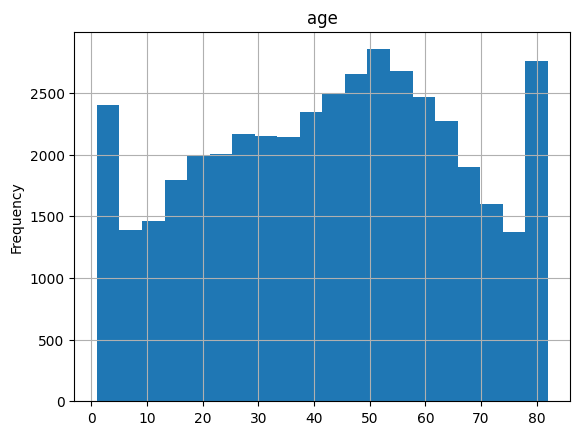

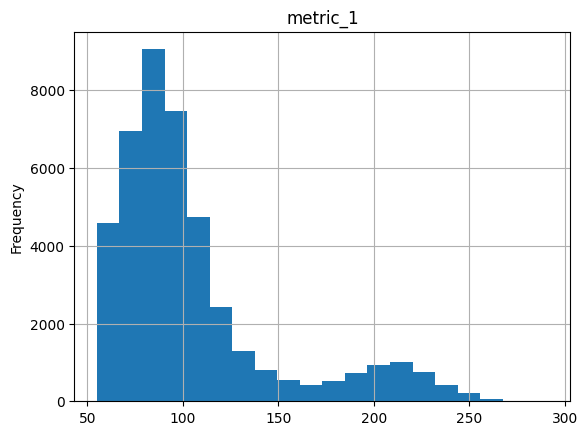

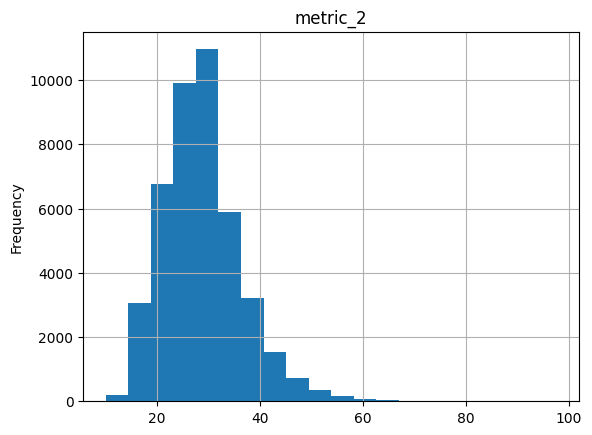

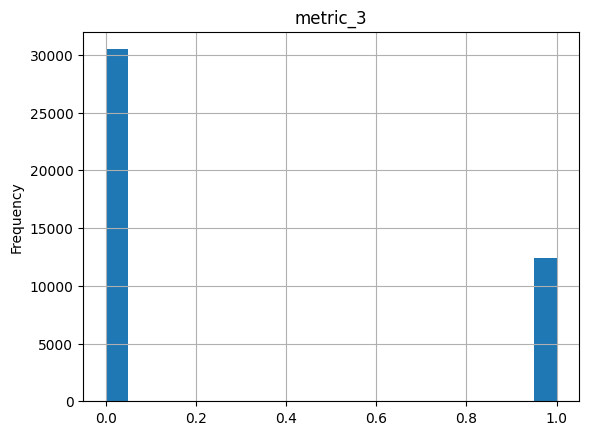

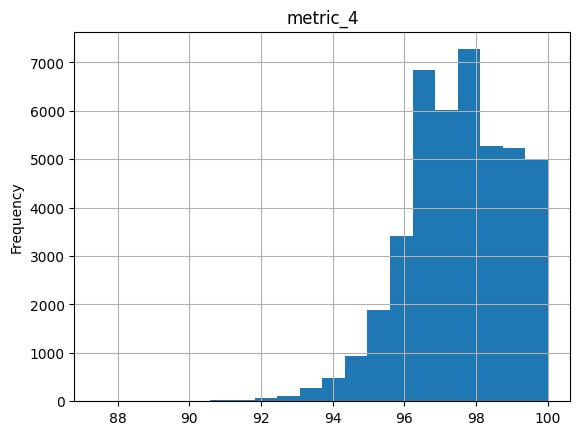

In [ ]:
#Numerical features
num_features = ['age', 'metric_1', 'metric_2', 'metric_3', 'metric_4']

# Visualizing distribution
for f in num_features:
    data[f].plot(kind='hist', bins=20)
    plt.title(f)
    plt.grid()
    plt.show()

Like I mentioned before, the numeric variables are heavily skewed (`metric_1` and `metric_2` seem to be right-skewed and `metric_4` is left-skewed). Since I am not certain of what these values exactly indicate, I choose to leave them as it is for now. 

`age` seems to be uniformly distributed, with some outliers near ages 1 and 80

<Axes: >

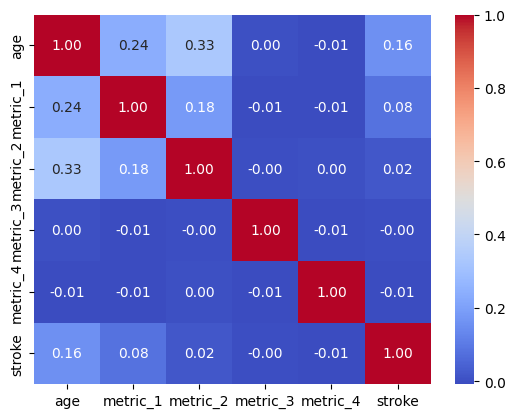

In [ ]:
correlation = data[num_features+['stroke']].corr()
# create a heatmap
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f')

Overall, the correlation of the numeric variables with our target variable `stroke` is visualized above. I do not see very high positive correlations, which might be due to the imbalanced nature of the dataset. However, `age` comes out as the strongest correlated numeric variable

The following plot shows the same correlation, but in sorted fashion. 

Text(0.5, 1.0, 'Features Correlating with stroke')

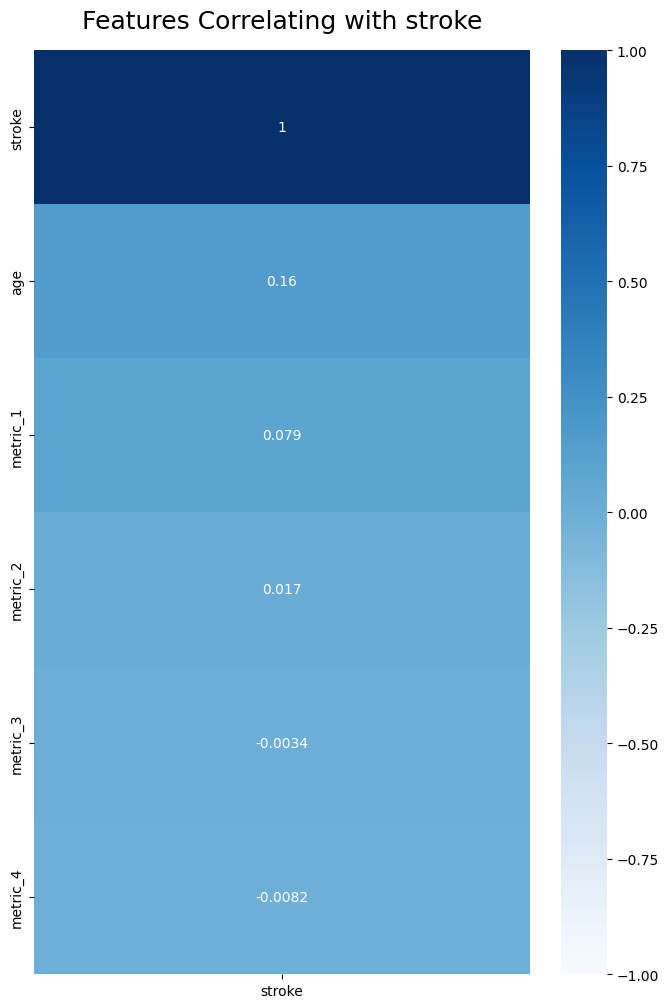

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data[num_features+['stroke']].corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with stroke', fontdict={'fontsize':18}, pad=16)

<Axes: xlabel='stroke', ylabel='age'>

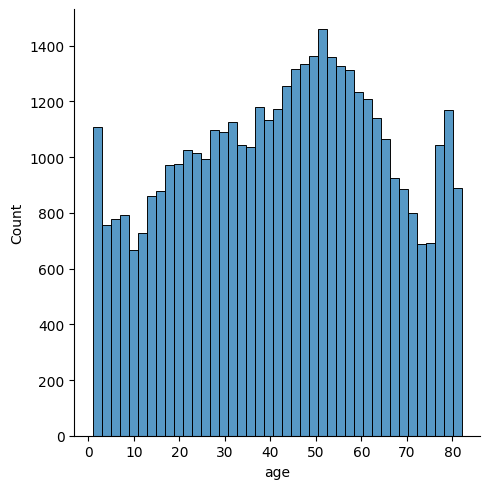

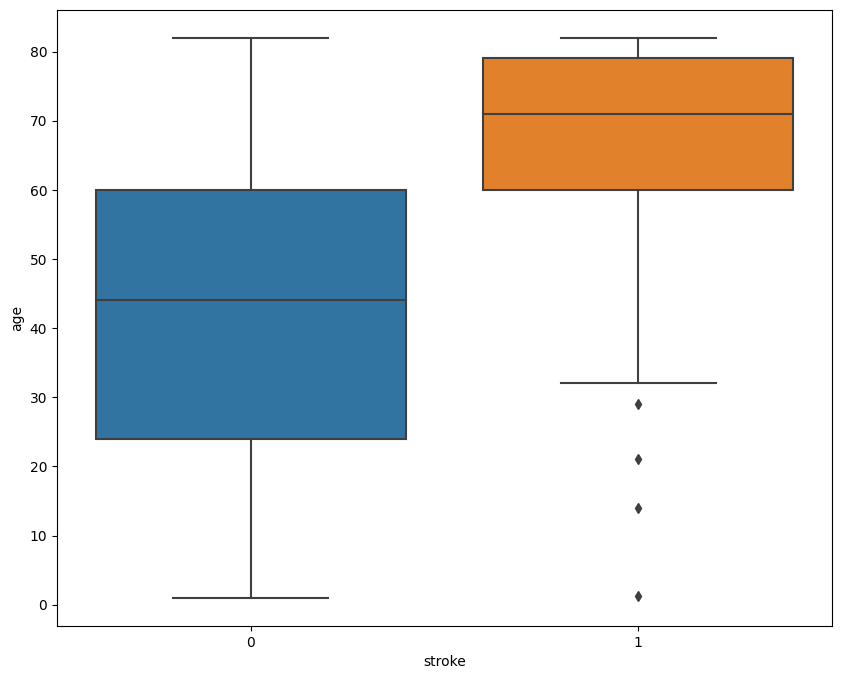

In [ ]:
# This will plot a distribution plot of variable age
sns.displot(data['age'])

# This code will plot a boxplot of variable age with respect of target attribute stroke
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='stroke',y='age')

Observation:

  - People aged more than 60 years tend to have a stroke. 
  - As mentioned earlier, some outliers can be seen as people below age 20 are having a stroke it might be possible that it’s valid data as stroke also depends on our eating and living habits and genetics.
  - Another observation is people not having strokes also consist of people age > 60 years.

<Axes: xlabel='stroke', ylabel='metric_1'>

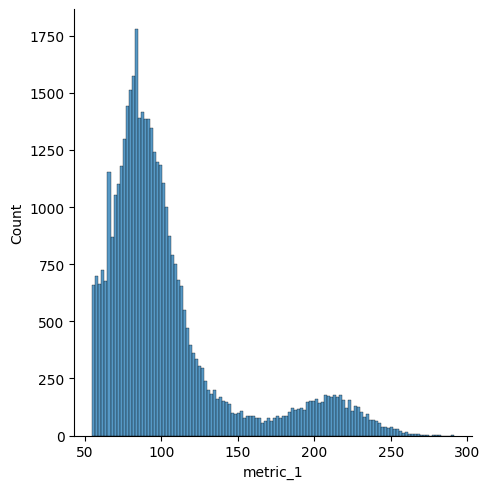

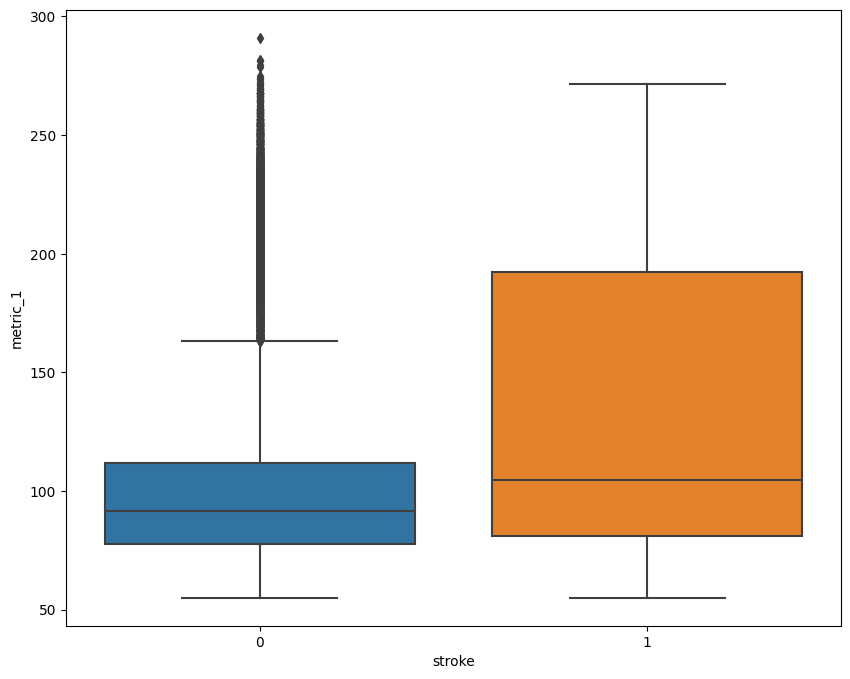

In [ ]:
# This will plot a distribution plot of variable metric_1
sns.displot(data['metric_1'])

# Above code will plot a boxplot of variable metric_1 with respect of target attribute stroke
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='stroke',y='metric_1')

Observation:

  - People having stroke have an average metric_1 score of more than 100. 
  - There are some obvious outliers in patients who have no stroke but since I do not have the data dictionary, there are some chances of this being genuine records.
  - Maybe this variable is indicative of the sugar levels of a patient since the values of patients who had a stroke are in the range of high sugar/glucose levels?

<Axes: xlabel='stroke', ylabel='metric_2'>

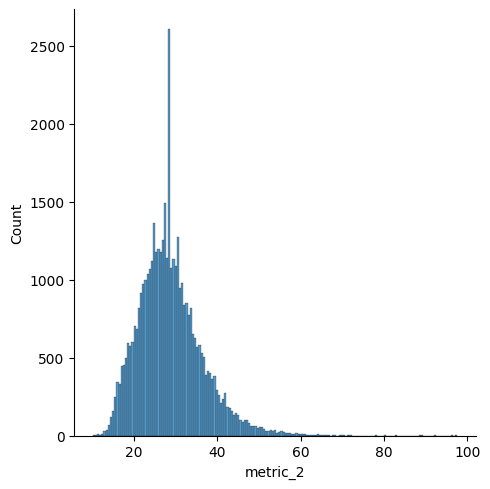

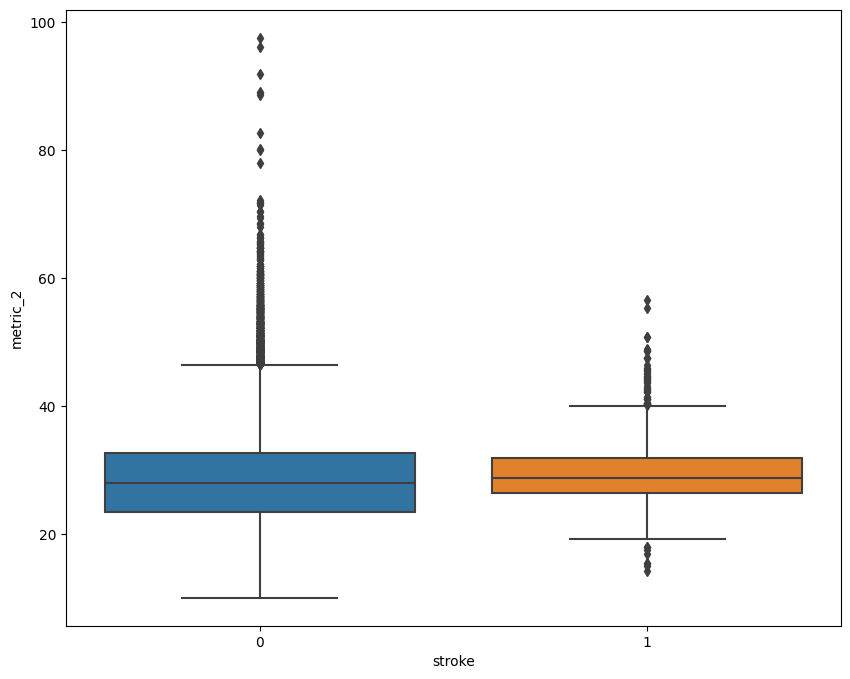

In [ ]:
# This will plot a distribution plot of variable metric_2
sns.displot(data['metric_2'])

# Above code will plot a boxplot of variable metric_2 with respect of target attribute stroke
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='stroke',y='metric_2')

Observation:

  - There is as such no prominent observation of how this variable affect the chances of having a stroke. This is supported by the weak correlation we saw for metric_2 in the correlation heatmap earlier

<Axes: xlabel='metric_3', ylabel='count'>

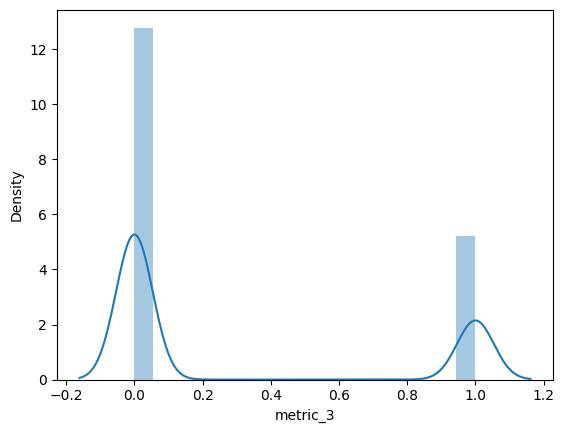

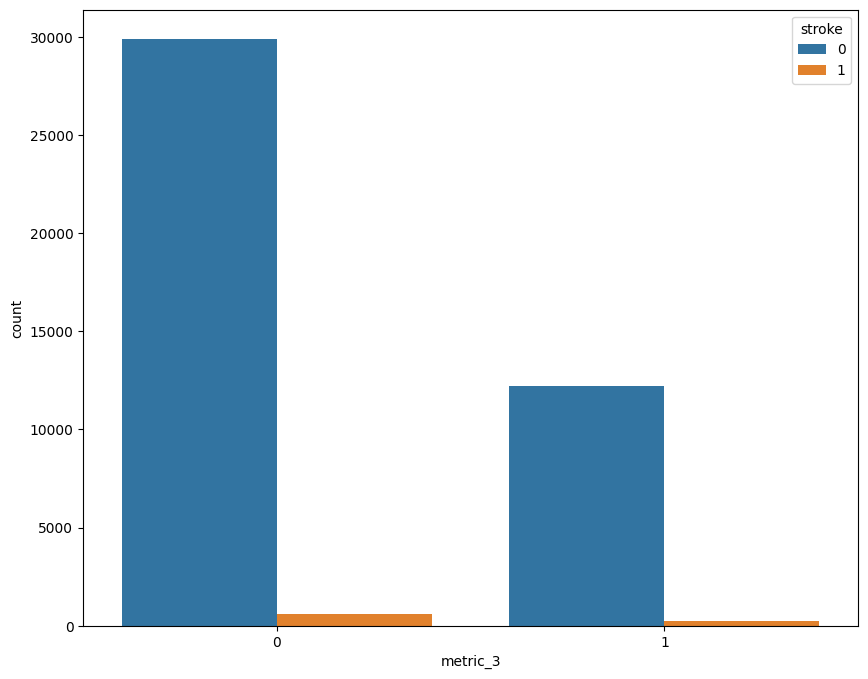

In [ ]:
# This will plot a distribution plot of variable metric_3
sns.distplot(data['metric_3'])

# Above code will plot a boxplot of variable metric_3 with respect of target attribute stroke
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='metric_3',hue='stroke')

Observation: 

  - Based on the distribution of the metric_3 variable, it seems this column is indicative of some categorical variable. 
  - Nevertheless, it shows a weak correlation with stroke as I can see that out of the patients who had a stroke, very few had metric_3 as value 1.

<Axes: xlabel='stroke', ylabel='metric_4'>

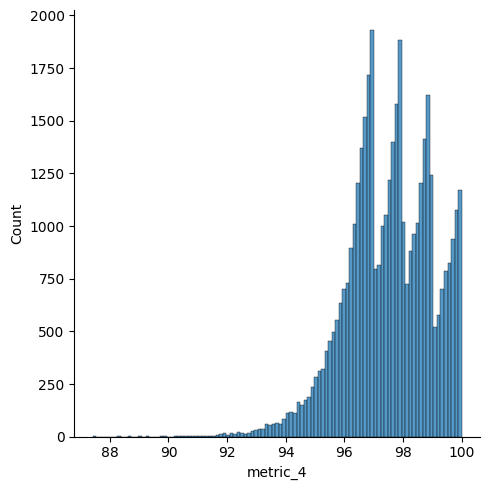

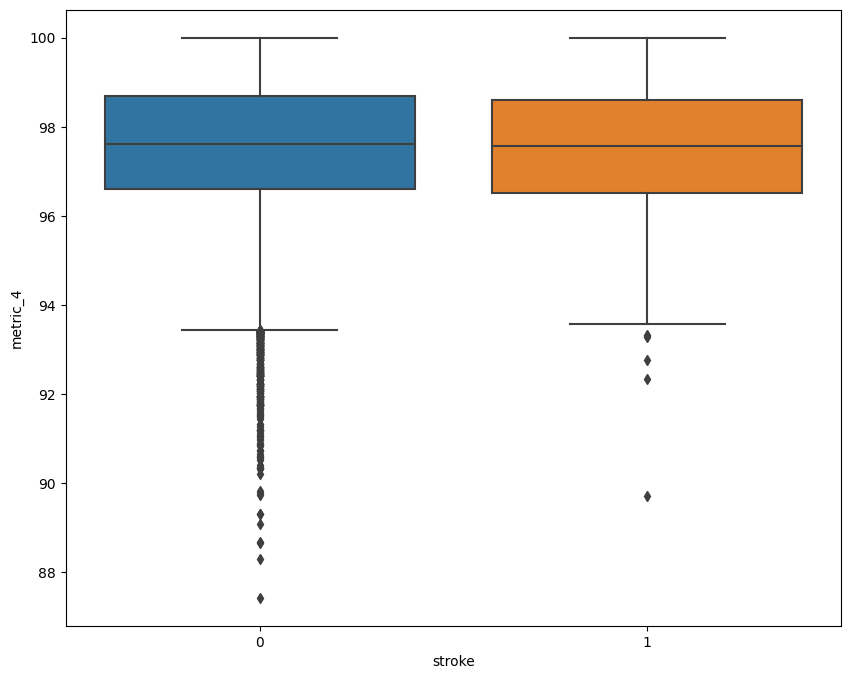

In [ ]:
# This will plot a distribution plot of variable metric_4
sns.displot(data['metric_4'])

# Above code will plot a boxplot of variable metric_4 with respect of target attribute stroke
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='stroke',y='metric_4')

Observation: 

  - Very interesting distribution of this variable, I notice some peaks at 97, 98, 99 and 100 values
  - Seems to be weakly correlated to the stroke variable since the boxplot does not tell us much

>> Moving on to the visualizations of the categorical variables now.

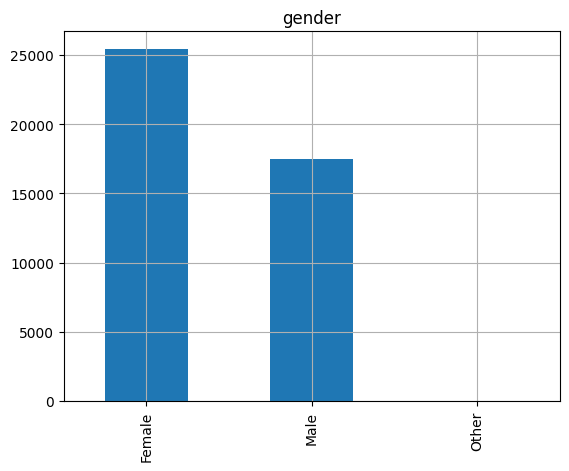

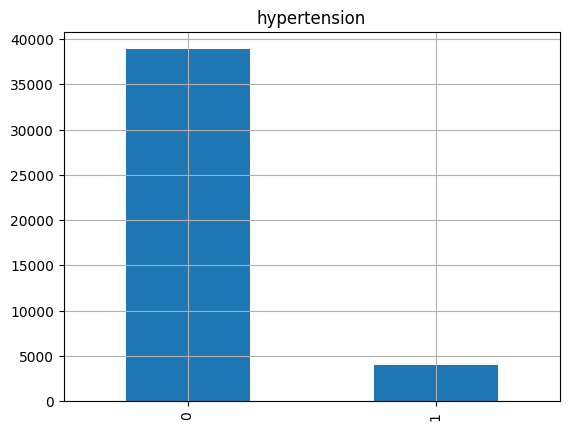

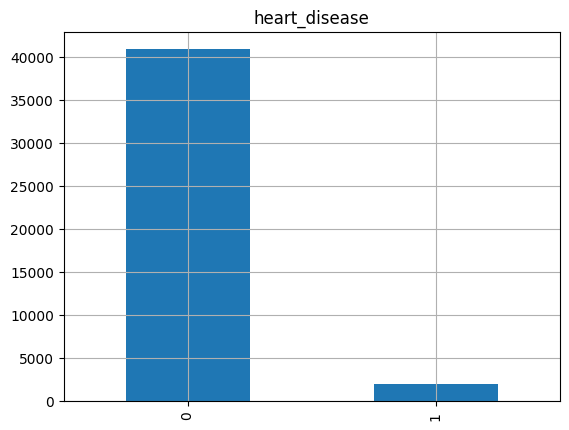

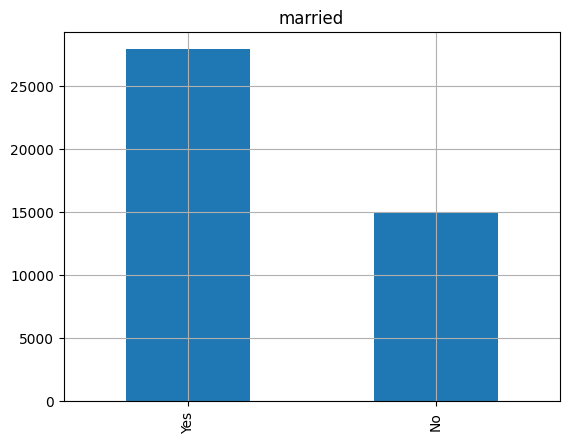

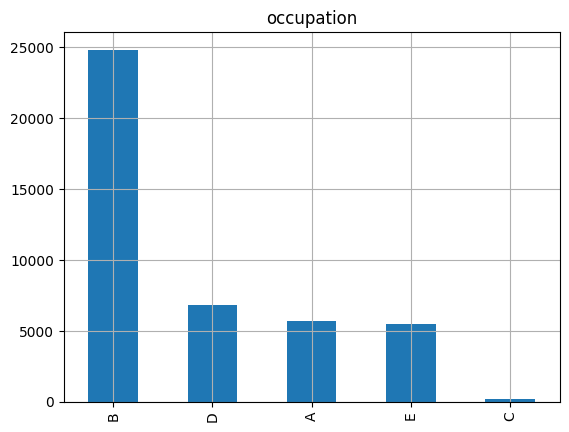

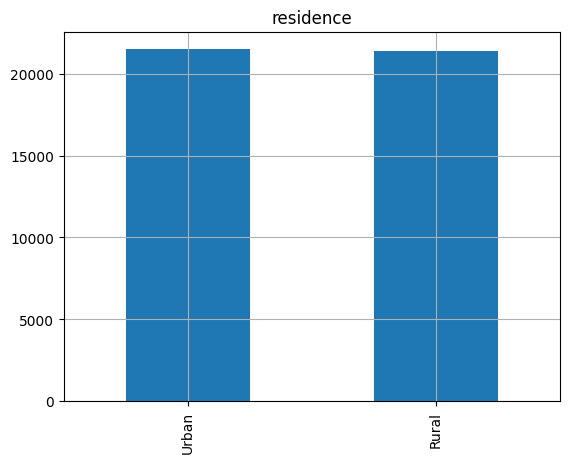

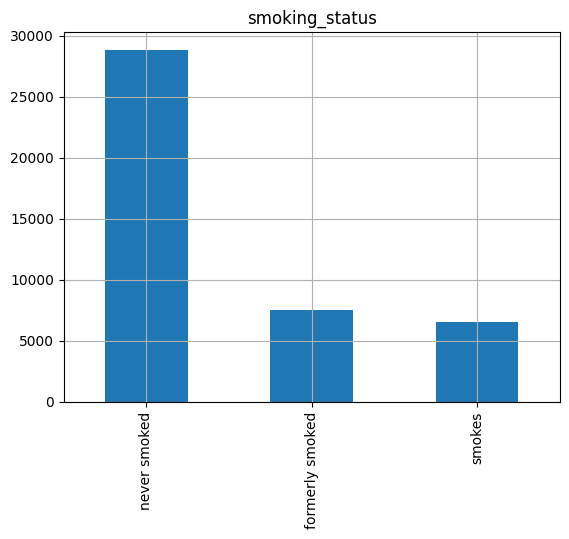

In [ ]:
#Categorical features
cat_features = ['gender','hypertension','heart_disease','married','occupation','residence','smoking_status']

#Visualizing frequencies
for f in cat_features:
    data[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

#LabelEncoding for categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['married'] = le.fit_transform(data['married'])
data['occupation'] = le.fit_transform(data['occupation'])
data['residence'] = le.fit_transform(data['residence'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

These all seem to be very clean plots. As I handled Null values and irrelavant values earlier, only the valid categories are present now. 

I now want to see how these variables correlate with my target variable - `stroke`

This is a new plot that I learned working on this project, the mosaic plot. 

This basically shows the percentages of data in groups.

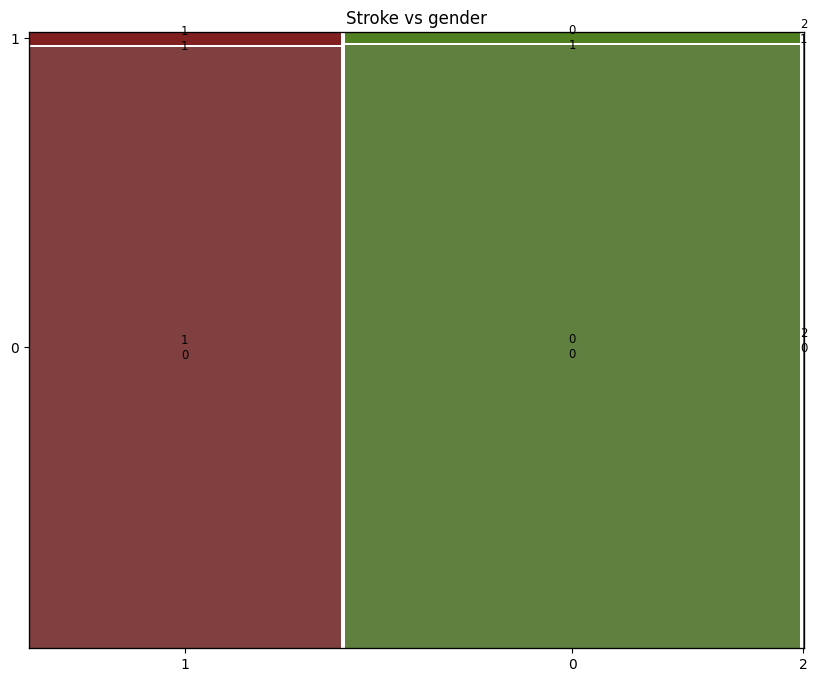

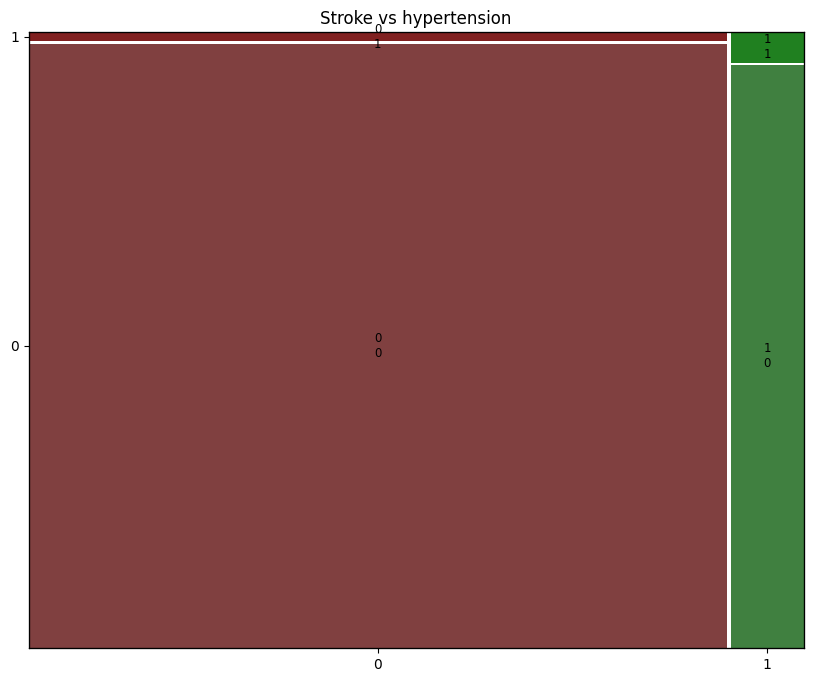

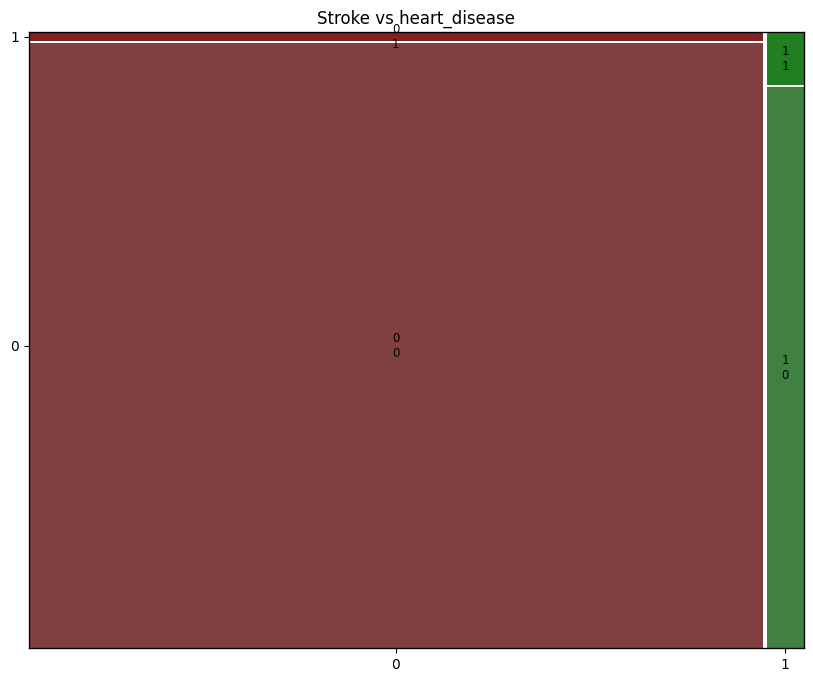

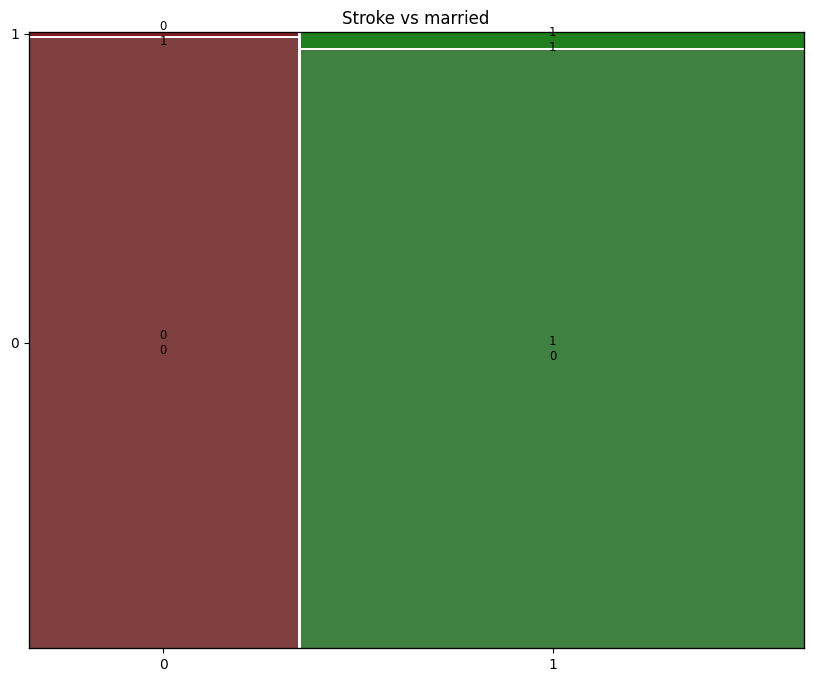

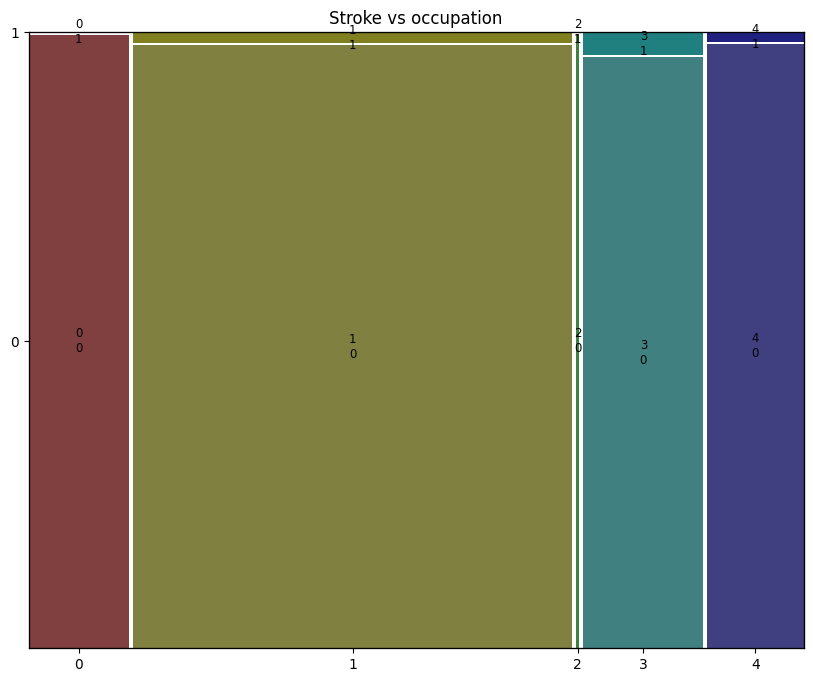

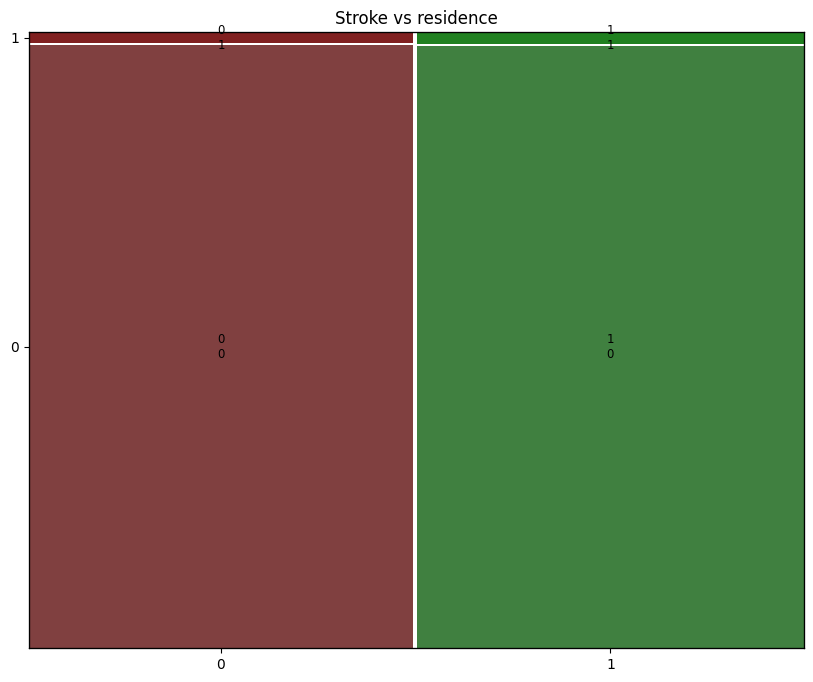

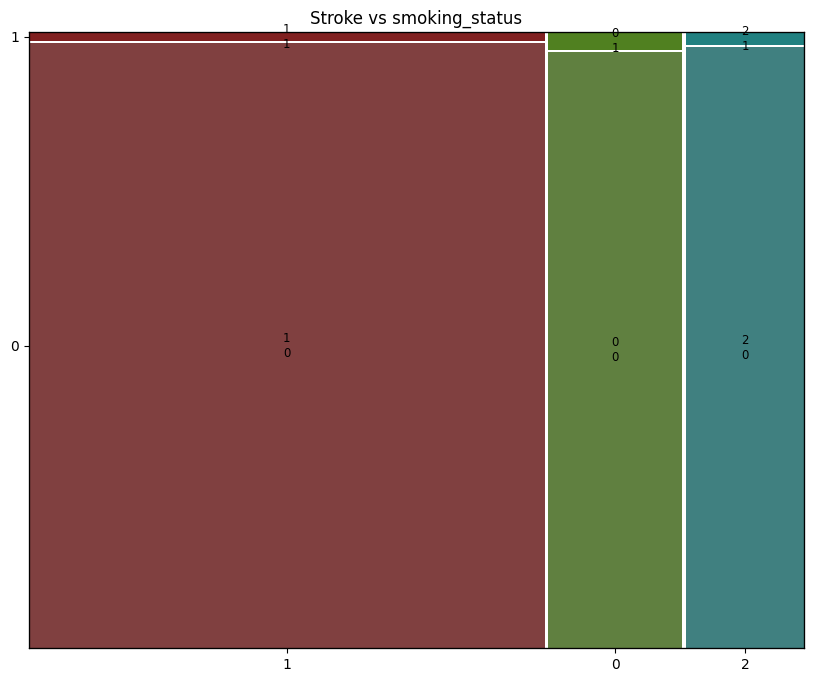

In [ ]:
# plot target vs features using mosaic plot
plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings

for f in cat_features:
    plt.rcParams["figure.figsize"] = (10,8) # increase plot size for mosaics
    mosaic(data, [f, 'stroke'], title='Stroke vs ' + f)
    plt.show()
    
# reset plot size again
plt.rcParams['figure.figsize'] = plt_para_save

Just to give a brief explanation of what this plot shows, let's take the example of the `stroke` vs `heart_disease` plot from above. Most of our data falls into the 0,0 group which means patients who have neither `heart_disease` nor `stroke`. But we do see a group of patients having both `heart_disease` and `stroke`

Overall, the correlation of the categorical variables with our target variable `stroke` is visualized below. Just like with numeric vriables, I do not see very high positive correlations, which might be due to the imbalanced nature of the dataset. However, `heart_disease` comes out as the strongest correlated categorical variable

<Axes: >

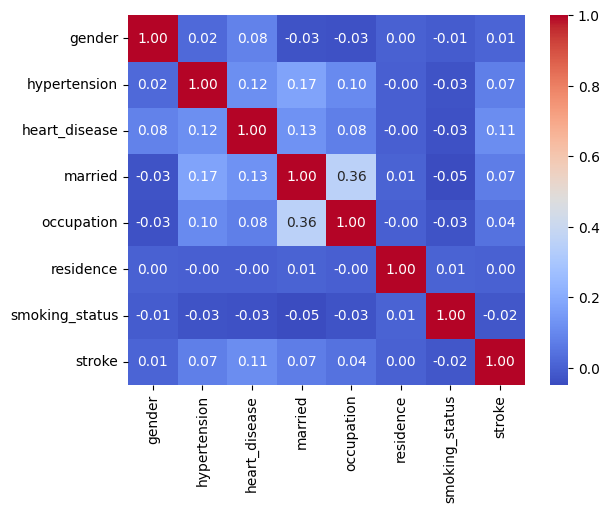

In [ ]:
correlation_cat = data[cat_features+['stroke']].corr()
# create a heatmap
sns.heatmap(correlation_cat, cmap='coolwarm', annot=True, fmt='.2f')

Text(0.5, 1.0, 'Features Correlating with stroke')

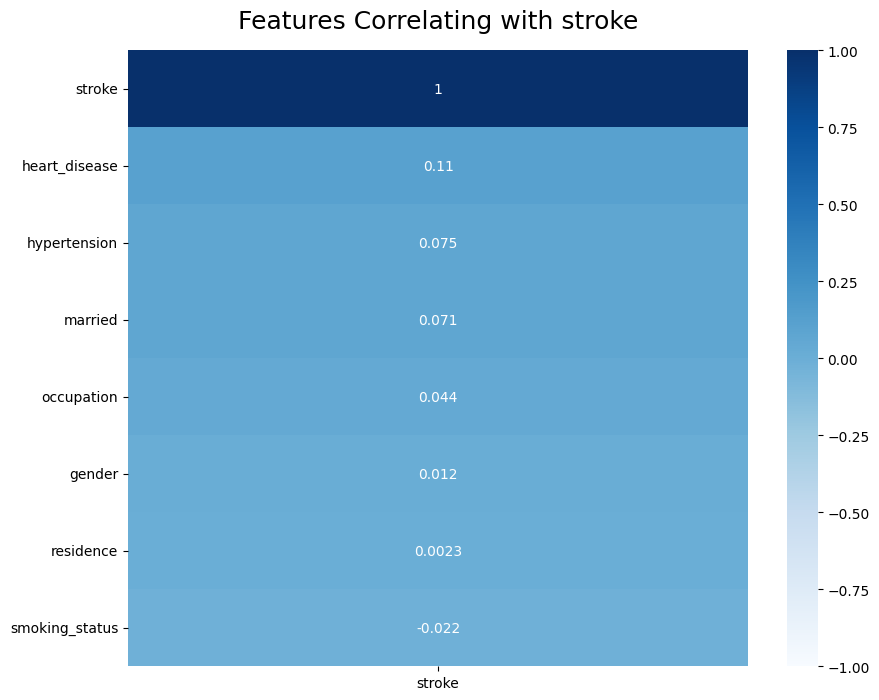

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data[cat_features+['stroke']].corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with stroke', fontdict={'fontsize':18}, pad=16)

Value Counts
 0    38841
1     4060
Name: hypertension, dtype: int64


<Axes: xlabel='hypertension', ylabel='count'>

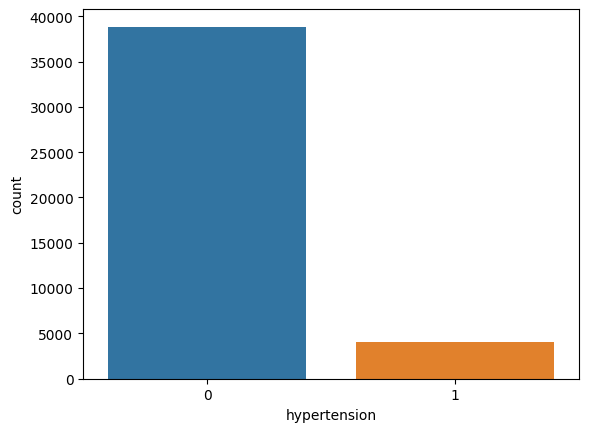

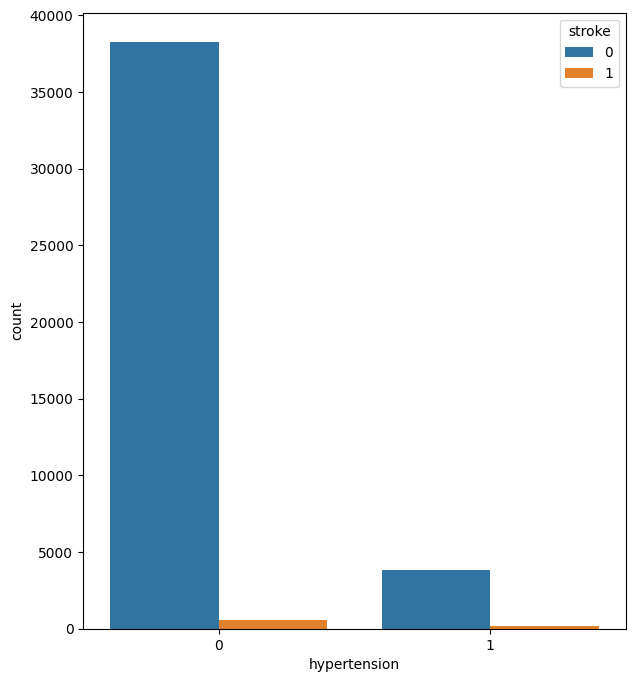

In [ ]:
# This codes will help to give us information about hypertension unique values and count of each value.
print('Value Counts\n',data['hypertension'].value_counts())

# Helps to plot a count plot which will help us to see count of values in each unique category.
sns.countplot(data=data,x='hypertension')

# This plot will help to analyze how hypertension will affect chances of stroke.
plt.figure(figsize= (7,8))
sns.countplot(data=data,x='hypertension',hue='stroke')

Observation:

  - Hypertension is rare in young people and common in aged people. 
  - Hypertension can cause a stroke. 
  - Based on our data picture is not that clear for hypertension. It has quite little data on patients having hypertension. Maybe because of the imbalanced stroke column

Value Counts
 0    40840
1     2061
Name: heart_disease, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

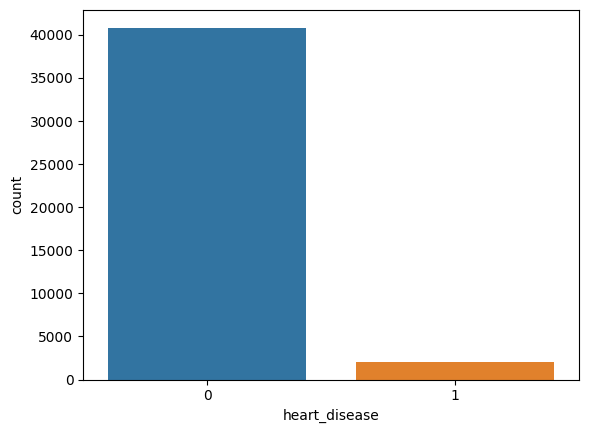

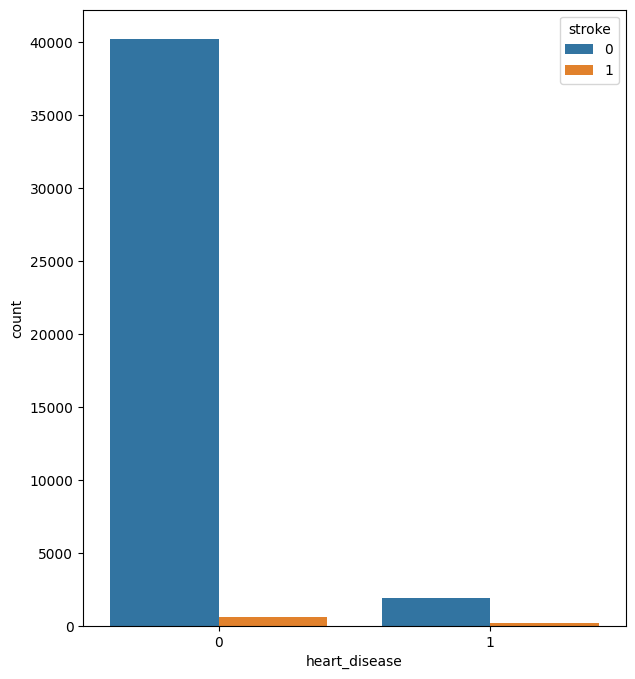

In [ ]:
# This codes will help to give us information aboutheart_disease unique values and count of each value.
print('Value Counts\n',data['heart_disease'].value_counts())

# Helps to plot a count plot which will help us to see count of values in each unique category.
sns.countplot(data=data,x='heart_disease')

# This plot will help to analyze how heart_disease will affect chances of stroke.
plt.figure(figsize=(7,8))
sns.countplot(data=data,x='heart_disease',hue='stroke')

Observation:

  - Because of the imbalanced dataset, it’s a little bit difficult to get an idea. 
  - But as per this plot, we can say that heart disease is affecting Stroke, becuase out of the small group which has heart_disease, most of them seem to have had a stroke too.

Value Counts
 1    27936
0    14965
Name: married, dtype: int64


<Axes: xlabel='married', ylabel='count'>

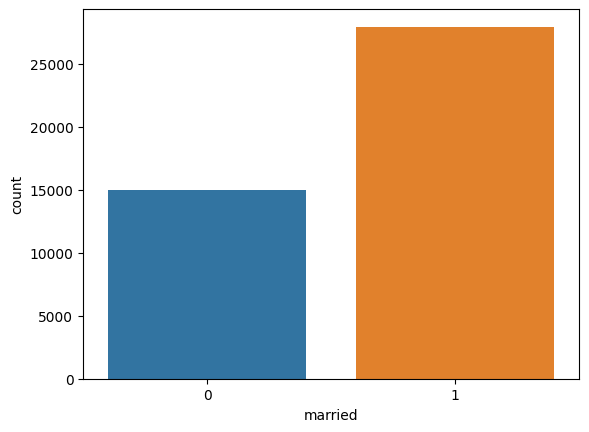

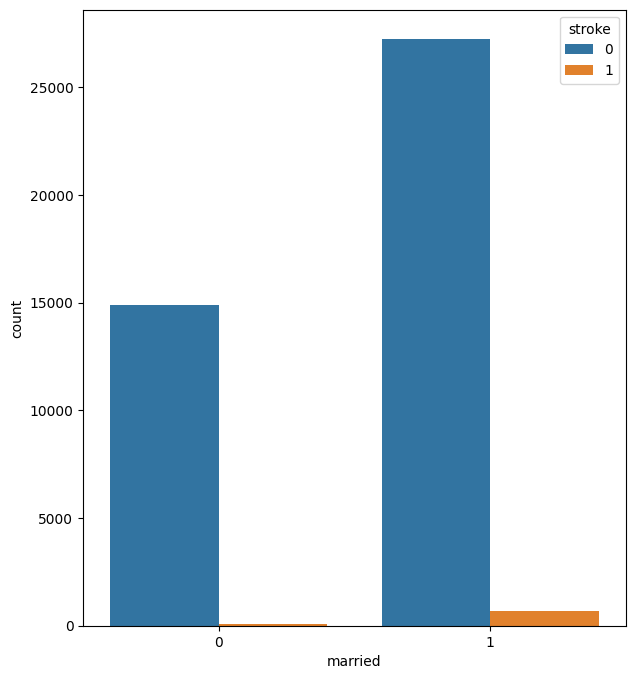

In [ ]:
# This codes will help to give us information about unique values and count of each value in married variable
print('Value Counts\n',data['married'].value_counts())

# Helps to plot a count plot which will help us to see count of values in each unique category.
sns.countplot(data=data,x='married')

# This plot will help to analyze how married status will affect chances of stroke.
plt.figure(figsize=(7,8))
sns.countplot(data=data,x='married', hue='stroke')

Observation:

  - It is very clear that people who are married have a higher stroke rate.

### Feature Selection

I have chosen to make myself super-sure of the features I will be using as my input variables and hence I choose to perform feature selection by incorporating the chi2 technique to evaluate the best 5 features.

In [ ]:
classifier = SelectKBest(score_func=chi2,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,12091.406034
7,metric_1,4752.649482
4,heart_disease,526.081866
3,hypertension,217.885434
5,occupation,85.538244
2,married,74.515272
8,metric_2,24.136679
11,smoking_status,6.704728
0,gender,3.449750
9,metric_3,0.345680


I choose my threshold to be 50.0 and so have chosen all features which have a score of 50.0 or above

In [ ]:
X = data[['age', 'heart_disease', 'metric_1', 'hypertension', 'married', 'occupation']]
y = data['stroke']

### Modeling

Finally, let's start the modeling process. 

Below, I have used the statsmodel library to train a glm model (with Binomial dsitribution - since this is a binary classification task). 

I have also implemented a logistic regression model (which is also a generalized linear model) from scratch and compared the performances of both.

In [ ]:
# Using the GLM package and model
def glm_package(X_train, y_train, X_test, y_test):
  # Fit GLM using the statsmodel library
  glm_model = stats.GLM(y_train, stats.add_constant(X_train), family=stats.families.Binomial())
  glm_results = glm_model.fit()

  # Evaluate performance
  glm_predictions = glm_results.predict(stats.add_constant(X_test))
  glm_predictions_binary = np.round(glm_predictions)
  glm_accuracy = np.mean(glm_predictions_binary == y_test)
  print('GLM accuracy: {:.2f}%'.format(glm_accuracy * 100))
  print('GLM cohen kappa score: {:.2f}'.format(cohen_kappa_score(y_test, glm_predictions_binary)))
  print('-'*40)

  # Generate classification report
  print('Classification report \n', classification_report(y_test, glm_predictions_binary))
  print('-'*40)

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, glm_predictions_binary, zero_division=0)
  recall = recall_score(y_test, glm_predictions_binary, zero_division=0)
  f1 = f1_score(y_test, glm_predictions_binary, zero_division=0)

  # Print the scores
  print('Precision: {:.2f}'.format(precision))
  print('Recall: {:.2f}'.format(recall))
  print('F1 score: {:.2f}'.format(f1))
  print('-'*40)

  # Visualizing Confusion Matrix
  plt.figure(figsize = (8, 5))
  sns.heatmap(confusion_matrix(y_test, glm_predictions_binary), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
              yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
  plt.yticks(rotation = 0)
  plt.show()

###-------MY IMPLEMENTATION OF LOGISTIC REGRESSION-------###
# Defining the link function of my GLM
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Defining the loss function of the GLM
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Using my version of GLM
def glm_scratch(X_train, y_train, X_test, y_test):
  # Fit GLM based on my code
  # Initialize the weights and biases
  weights = np.zeros(X_train.shape[1])
  bias = 0

  # Define the learning rate and number of iterations
  learning_rate = 0.00005
  n_iterations = 10000

  # Perform gradient descent
  for i in range(n_iterations):
      # Calculate the predicted output
      linear_output = np.dot(X_train, weights) + bias
      y_pred = sigmoid(linear_output)
      # Calculate the gradient of the loss function w.r.t. weights and biases
      d_weights = (1 / X_train.shape[0]) * np.dot(X_train.T, (y_pred - y_train))
      d_bias = (1 / X_train.shape[0]) * np.sum(y_pred - y_train)
      # Update the weights and biases
      weights -= learning_rate * d_weights
      bias -= learning_rate * d_bias
      # Print the loss every 100 iterations
      if i % 1000 == 0:
          loss = log_loss(y_train, y_pred)
          print(f'Iteration {i}: Loss = {loss}')

  # Calculate the predicted output
  linear_output = np.dot(X_test, weights) + bias
  y_pred = sigmoid(linear_output)

  # Calculate the accuracy of the model
  accuracy = np.mean((y_pred > 0.5) == y_test)
  print(f'Accuracy = {accuracy}')
  print('GLM cohen kappa score: {:.2f}'.format(cohen_kappa_score(y_test, np.round(y_pred))))
  print('-'*40)

  # Generate classification report
  print(classification_report(y_test, np.round(y_pred)))
  print('-'*40)

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, np.round(y_pred), zero_division=0)
  recall = recall_score(y_test, np.round(y_pred), zero_division=0)
  f1 = f1_score(y_test, np.round(y_pred), zero_division=0)

  # Print the scores
  print('Precision: {:.2f}'.format(precision))
  print('Recall: {:.2f}'.format(recall))
  print('F1 score: {:.2f}'.format(f1))
  print('-'*40)
  
  # Visualizing Confusion Matrix
  plt.figure(figsize = (8, 5))
  sns.heatmap(confusion_matrix(y_test, np.round(y_pred)), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
              yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
  plt.yticks(rotation = 0)
  plt.show()

Now, let's proceed to split the train and test data. Following which, I will be scaling my data 

In [ ]:
#Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 43, test_size = 0.3)

#Scale the train and test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's see the performance of GLM model from the statsmodel package

GLM accuracy: 98.18%
GLM cohen kappa score: 0.00
----------------------------------------
Classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12637
           1       0.00      0.00      0.00       234

    accuracy                           0.98     12871
   macro avg       0.49      0.50      0.50     12871
weighted avg       0.96      0.98      0.97     12871

----------------------------------------
Precision: 0.00
Recall: 0.00
F1 score: 0.00
----------------------------------------


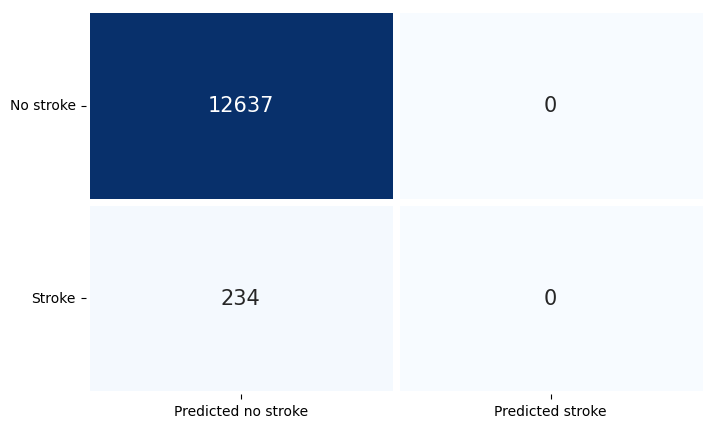

In [ ]:
glm_package(X_train, y_train, X_test, y_test)

This GLM model has a high accuracy of 98.18%, but this metric can be misleading in a binary classification problem when the classes are imbalanced. 

In this case, the accuracy is mainly driven by the large number of true negatives (no stroke) correctly classified, but the model is not able to identify any of the true positives (stroke) correctly. This is reflected in the classification report, where the precision, recall, and F1 score for the positive class (stroke) are all 0. This indicates that the model is not useful for identifying strokes and needs to be improved. 

Additionally, the Cohen's kappa score is 0, which means that the model's performance is not better than what could be achieved by chance. Overall, the GLM model is not effective for this binary classification problem.

Now let's see the performance on my glm and compare their performances

Iteration 0: Loss = 0.6931471805599453
Iteration 1000: Loss = 0.6816377434890463
Iteration 2000: Loss = 0.6704136809077147
Iteration 3000: Loss = 0.659467757060364
Iteration 4000: Loss = 0.6487928501841814
Iteration 5000: Loss = 0.6383819579569249
Iteration 6000: Loss = 0.6282282021793172
Iteration 7000: Loss = 0.6183248327389266
Iteration 8000: Loss = 0.608665230902276
Iteration 9000: Loss = 0.5992429119813485
Accuracy = 0.9818195944371066
GLM cohen kappa score: 0.00
----------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12637
           1       0.00      0.00      0.00       234

    accuracy                           0.98     12871
   macro avg       0.49      0.50      0.50     12871
weighted avg       0.96      0.98      0.97     12871

----------------------------------------
Precision: 0.00
Recall: 0.00
F1 score: 0.00
----------------------------------------


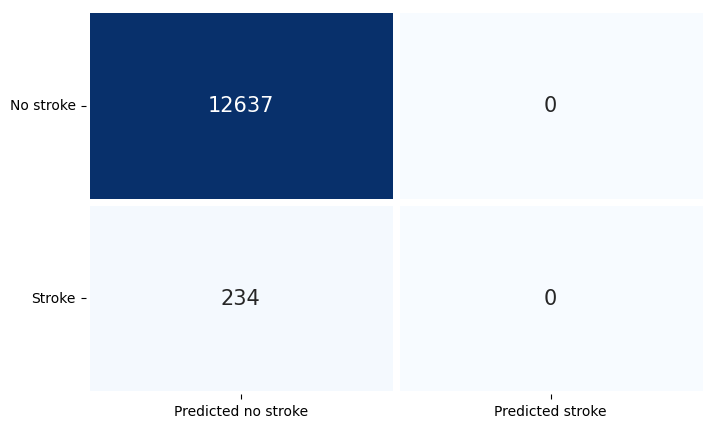

In [ ]:
glm_scratch(X_train, y_train, X_test, y_test)

Pretty much the same results as earlier. Good news, my implementation of GLM seems to be working at par with the statsmodel counterpart. Bad news, the classification is very poor.

### Balancing the data using SMOTE

As I have discussed multiple times before, our dataset is highly imbalanced and needs to be oversampled/undersampled or a combination of both. I will not be explaining what sampling is in details in this notebook, however, just a brief note: Since the number of records we have for patients with stroke (`stroke` = 1) is very very less compared to patients who did not have a stroke (`stroke` = 0), I will be incorporating a technique called SMOTE to balance the number of records in both categories to improve the performance of my classifier

In [ ]:
#Applying SMOTE
smote = SMOTEENN(random_state = 43) 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

Now, let's see if the performance of the statsmodel glm has improved after balancing the data?

GLM accuracy: 84.86%
GLM cohen kappa score: 0.70
----------------------------------------
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      9852
           1       0.84      0.87      0.85     10216

    accuracy                           0.85     20068
   macro avg       0.85      0.85      0.85     20068
weighted avg       0.85      0.85      0.85     20068

----------------------------------------
Precision: 0.84
Recall: 0.87
F1 score: 0.85
----------------------------------------


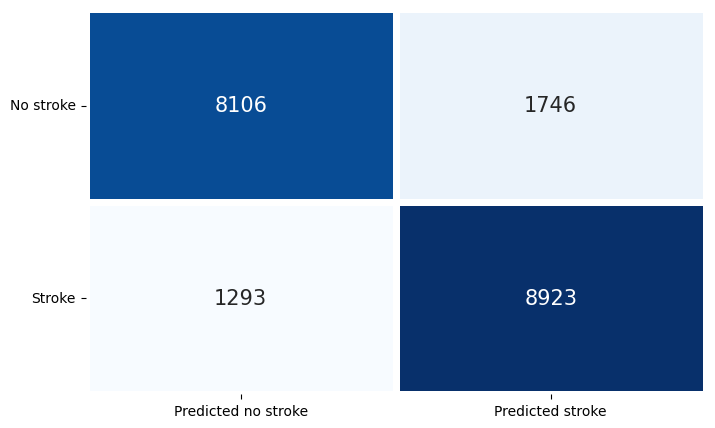

In [ ]:
glm_package(X_train_smote, y_train_smote, X_test_smote, y_test_smote)

It seems that after balancing the data using SMOTE, the accuracy of the GLM model has decreased from 98.18% to 84.86%. However, the Cohen's Kappa score has improved from 0.00 to 0.70, which is a significant improvement.

Looking at the classification report, the precision and recall for both classes (0 and 1) are now higher and more balanced than before, indicating a better performance of the model in predicting both classes. The F1 score has also improved from 0.00 to 0.85, which is a good improvement.

Let's compare the performance against my own glm

Iteration 0: Loss = 0.6931471805599453
Iteration 1000: Loss = 0.6778177757313866
Iteration 2000: Loss = 0.6638178182433191
Iteration 3000: Loss = 0.6510143750075268
Iteration 4000: Loss = 0.6392855156086268
Iteration 5000: Loss = 0.6285205837272883
Iteration 6000: Loss = 0.6186199612603356
Iteration 7000: Loss = 0.6094944994798999
Iteration 8000: Loss = 0.6010647551877858
Iteration 9000: Loss = 0.5932601338231469
Accuracy = 0.7969404026310544
GLM cohen kappa score: 0.59
----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      9852
           1       0.73      0.96      0.83     10216

    accuracy                           0.80     20068
   macro avg       0.83      0.79      0.79     20068
weighted avg       0.83      0.80      0.79     20068

----------------------------------------
Precision: 0.73
Recall: 0.96
F1 score: 0.83
----------------------------------------


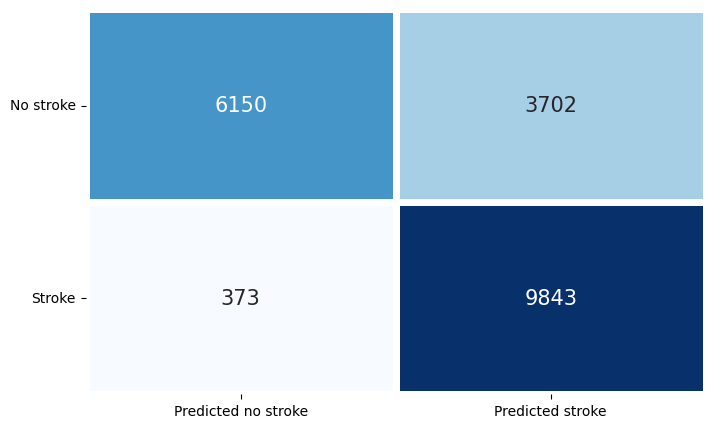

In [ ]:
glm_scratch(X_train_smote, y_train_smote, X_test_smote, y_test_smote)

Here, we see an accuracy of 0.7969, which indicates that the model correctly predicted 79.69% of the total cases.

The GLM cohen kappa score of 0.59 suggests moderate agreement between the predicted and actual classes.

Looking at the classification report, we can see that the model has a precision of 0.73, recall of 0.96, and an F1 score of 0.83 for the positive class (class 1), which means that the model has good performance in identifying the positive class (i.e., patients who had a stroke).

However, the model's performance for the negative class (class 0) is not as good, with a precision of 0.94 and a recall of 0.62. This means that the model has a higher tendency to incorrectly predict patients as not having a stroke (false negatives) than to predict correctly.

Since this is a medical problem, I feel that recall is more important than precision. We need to correctly identify the patients who are at risk of having a stroke, even though we sometimes predict the ones who aren't at the risk of a stroke as well. And so, I feel my glm performs well to classify and identify the patients at risk of stroke.

### Trying KNN, RandomForest and XGBoost Classifiers

Overall, our model's performance seems to be good but with room for improvement, especially for the negative class. 

It's also important to consider the specific requirements and constraints of the problem, and to evaluate the model's performance using additional metrics and techniques such as cross-validation or ROC analysis.

So let's do that!

I'm going to be choosing three algorithms for comparision:
  - KNN Classifier
  - Random Forest Classifier
  - XGBoost Classififer

I will perform hyper-parameter tuning to pick the best parameters for the above models, train the best models and then evaluate using the metrics I had above (accuracy, cohen_kappa, etc.) as well as some new ones (roc, auc, etc.)

I am also going to try implementing an Artificial Neural Network, just to see if that improves the results?

Not going into the details of KNN, I will basically perform GridSearch to find the best parameters for my KNN classifier, then model the training data (balanced) on the KNN classifier (from sklearn) and evaluate the results.

In [ ]:
# Define the hyperparameter grid for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object for KNN
knn_grid = GridSearchCV(knn, knn_param_grid, cv=10)

# Fit the GridSearchCV/RandomizedSearchCV objects to the data
knn_grid.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters for KNN
print('Best hyperparameters for KNN:', knn_grid.best_params_)

Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


Based on the best parameters I found above, thanks to GridSearchCV, I now model my KNN

Accuracy for KNN: 0.7102352003189157
KNN cohen kappa score: 0.42
----------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      9852
           1       0.82      0.55      0.66     10216

    accuracy                           0.71     20068
   macro avg       0.74      0.71      0.70     20068
weighted avg       0.74      0.71      0.70     20068

----------------------------------------
Precision for KNN: 0.82
Recall for KNN: 0.55
F1 score for KNN: 0.66


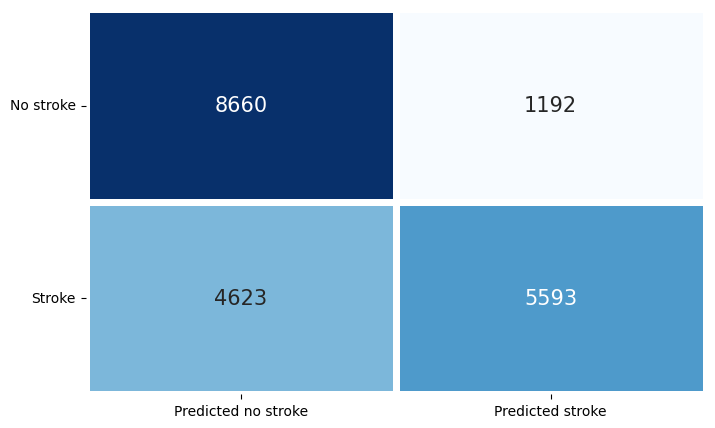

In [ ]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test_smote)
accuracy_knn = accuracy_score(y_test_smote, y_pred_knn)
print("Accuracy for KNN:", accuracy_knn)
print('KNN cohen kappa score: {:.2f}'.format(cohen_kappa_score(y_test_smote, y_pred_knn)))
print('-'*40)

# Generate classification report for KNN
print(classification_report(y_test_smote, y_pred_knn))
print('-'*40)

# Calculate precision, recall, and F1 score for KNN
precision_knn = precision_score(y_test_smote, y_pred_knn, zero_division=0)
recall_knn = recall_score(y_test_smote, y_pred_knn, zero_division=0)
f1_knn = f1_score(y_test_smote, y_pred_knn, zero_division=0)

# Print the scores for KNN
print('Precision for KNN: {:.2f}'.format(precision_knn))
print('Recall for KNN: {:.2f}'.format(recall_knn))
print('F1 score for KNN: {:.2f}'.format(f1_knn))

# Visualizing Confusion Matrix for KNN
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test_smote, y_pred_knn), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

KNN seems to be performing worse than our GLMs.
71% of the predictions made by the model are correct. The KNN cohen kappa score is 0.42, which is moderate agreement between the predicted and actual classes.

The model achieved a precision of 0.82, which means that when it predicts the positive class (1), it is correct 82% of the time. The recall, or true positive rate, is 0.55, which means that only 55% of the actual positive samples were correctly identified as such by the model, which is dangerous in a medical setting.

In terms of the confusion matrix, the model correctly predicted 0 (negative) class samples 88% of the time, but only correctly predicted 1 (positive) class samples 55% of the time. This suggests that the model may be better at identifying negative cases than positive cases.

But overall, I would prefer our earlier GLM to this.

Let's proceed with Random Forest now. Since this a more sohpisticated ensemble algorithm, I am expecting it to improve the performance. 

Same as with KNN, I will be performing RandomizedSearch this time to find the best parameters for the Random Forest classifier.

In [ ]:
# Define the hyperparameter grid for Random Forest
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20), 
              'criterion' : ['gini', 'entropy']}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object for Random Forest
rf_grid = RandomizedSearchCV(rf, param_dist, n_iter = 10, cv=10)

# Fit the random search object to the data
rf_grid.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters for Random Forest
print('Best hyperparameters for Random Forest:', rf_grid.best_params_)

Best hyperparameters for Random Forest: {'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 334}


Accuracy for Random Forest: 0.7696830775363763
Random Forest cohen kappa score: 0.42
----------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      9852
           1       0.88      0.63      0.74     10216

    accuracy                           0.77     20068
   macro avg       0.79      0.77      0.77     20068
weighted avg       0.79      0.77      0.77     20068

----------------------------------------
Precision for Random Forest: 0.88
Recall for Random Forest: 0.63
F1 score for Random Forest: 0.74


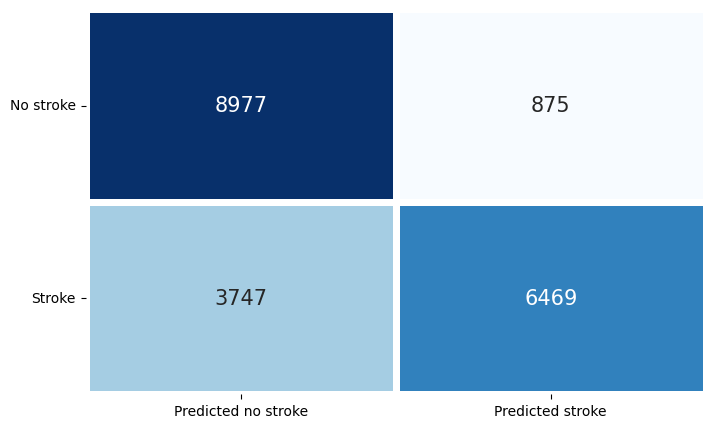

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=334)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_smote)
accuracy_rf = accuracy_score(y_test_smote, y_pred_rf)
print("Accuracy for Random Forest:", accuracy_rf)
print('Random Forest cohen kappa score: {:.2f}'.format(cohen_kappa_score(y_test_smote, y_pred_knn)))
print('-'*40)
# Generate classification report for Random Forest
print(classification_report(y_test_smote, y_pred_rf))
print('-'*40)
# Calculate precision, recall, and F1 score for Random Forest
precision_rf = precision_score(y_test_smote, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test_smote, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test_smote, y_pred_rf, zero_division=0)
# Print the scores for Random Forest
print('Precision for Random Forest: {:.2f}'.format(precision_rf))
print('Recall for Random Forest: {:.2f}'.format(recall_rf))
print('F1 score for Random Forest: {:.2f}'.format(f1_rf))
# Visualizing Confusion Matrix for Random Forest
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test_smote, y_pred_rf), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

The Random Forest model has a higher accuracy, precision recall, and F1-score than the KNN model. The Cohen's Kappa score is the same for both models, indicating that they are in moderate agreement with the true labels.

Overall, the Random Forest model appears to perform better than the KNN model, based on the higher accuracy and higher performance metrics for both classes.

Now, I'm going to try the XGBoost Classifier, which I hope will give the best performance so far (since it is a highly advanced ensemble learning algorithm based on Boostin techniques)

For this, I have also implemented the **k-fold validation**, which should improve the performance.

I will also be evaluating the roc, auc score as well as the Roc-Auc curve for this model just to discuss its performance.

In [ ]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])

for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_smote,y_train_smote)
    y_pred = model.predict(X_test_smote)
    cm = confusion_matrix(y_test_smote,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_smote,y = y_train_smote, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test_smote,y_pred)
    precision = precision_score(y_test_smote,y_pred)
    recall = recall_score(y_test_smote,y_pred)
    f1 = f1_score(y_test_smote,y_pred)
    accuracy = accuracy_score(y_test_smote,y_pred)
    k_fold_mean_acc = accuracies.mean()
    k_fold_std = accuracies.std()
    results = {
        "Accuracy score": accuracy,
        "K-Fold Mean Accuracy" : k_fold_mean_acc,
        "K-Fold Standard Deviation" : k_fold_std,
        "ROC" : roc
    }

pprint(results)

{'Accuracy score': 0.9088100458441299,
 'K-Fold Mean Accuracy': 0.9586942421850516,
 'K-Fold Standard Deviation': 0.009875181336067868,
 'ROC': 0.9091724317073581}


In [ ]:
# Define the parameter distribution
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20), 
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
              'gamma': [0, 1, 5]}

# Create an XGBoost Classifier
xgb = XGBClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(xgb, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=10)

# Fit the random search object to the data
rand_search.fit(X_train_smote, y_train_smote)

# Create a variable for the best model
best_xgb = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Accuracy: 0.9353697428742276
XGBoost cohen kappa score: 0.87
----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9852
           1       0.97      0.90      0.93     10216

    accuracy                           0.94     20068
   macro avg       0.94      0.94      0.94     20068
weighted avg       0.94      0.94      0.94     20068

----------------------------------------
Precision: 0.97
Recall: 0.90
F1 score: 0.93


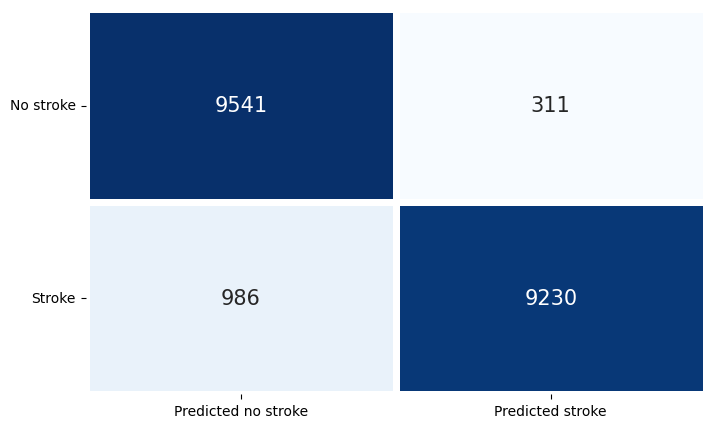

Text(0.5, 0, 'False Positive Rate')

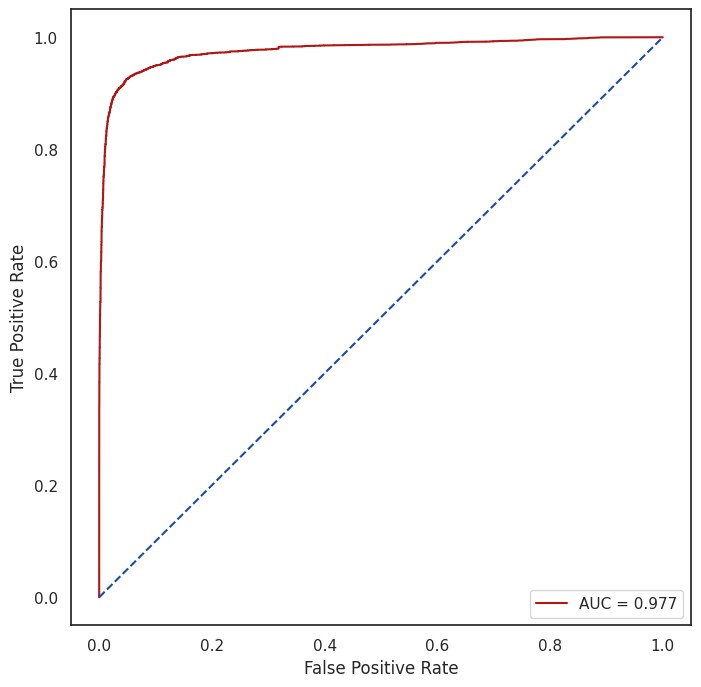

In [ ]:
# Fit the best model to the data
xgb = XGBClassifier(n_estimators=best_xgb.get_params()['n_estimators'],
                    max_depth=best_xgb.get_params()['max_depth'],
                    learning_rate=best_xgb.get_params()['learning_rate'],
                    subsample=best_xgb.get_params()['subsample'],
                    colsample_bytree=best_xgb.get_params()['colsample_bytree'],
                    gamma=best_xgb.get_params()['gamma'])

xgb.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb.predict(X_test_smote)
y_prob = xgb.predict_proba(X_test_smote)[:,1]

# Evaluate the model
accuracy = accuracy_score(y_test_smote, y_pred)
print("Accuracy:", accuracy)
print('XGBoost cohen kappa score: {:.2f}'.format(cohen_kappa_score(y_test_smote, y_pred)))
print('-'*40)

# Generate classification report
print(classification_report(y_test_smote, y_pred))
print('-'*40)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_smote, y_pred, zero_division=0)
recall = recall_score(y_test_smote, y_pred, zero_division=0)
f1 = f1_score(y_test_smote, y_pred, zero_division=0)

# Print the scores
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test_smote, y_pred), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smote, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The XGBoost classifier has a very good performance. It has an accuracy of 0.9353, indicating that the model has correctly predicted 93.53% of the total cases.

Looking at the classification report, we can see that the model has high precision (0.97) and recall (0.92) for both positive (class 1) and negative (class 0) classes. This indicates that the model has a very good ability to predict both classes accurately.

Moreover, the XGBoost classifier's Cohen's kappa score of 0.87 indicates a high level of agreement between the predicted and true labels beyond chance, which is another indication of the model's good performance.

Here, I have also used the ROC-AUC curve to evaluate this model. I observe a AUC score of 0.977 which is really great and indicates that this XGBoost classifier performs well on both positive and negative classes. The area under the ROC curve (ROC-AUC) is a single value that represents the overall performance of the classifier. The ROC-AUC ranges from 0 to 1, with 1 being a perfect classifier and 0.5 being a random classifier. Our XGBoost classifier has a score of 0.977 which is awesome!

A high ROC-AUC value indicates that the model is better at distinguishing between the two classes, while a low value indicates poor performance.

Overall, the **XGBoost classifier has demonstrated a strong performance for stroke prediction, and its high precision and recall for both classes suggest that it may be useful in clinical practice.**

### Artificial Neural Network

Here, I try a simple Artificial Neural Network with 2 hidden layers and 1 output layer. I have initialized the Neural Network layers using tensorflow and added a dropout threshold of 0.5 (it means that 50% of the input units will be randomly set to zero during training.)

My activation function for the hidden layers is ReLu (rectified linear unit) since it is more efficient as compared to sigmoid and tanh 

To prevent overfitting, I have also added a callback to early_stop which is my Early stopping object. It will monitor the performance of the model during training and stopping the training process once the performance of the model on the validation set stops improving. The idea is that the model will achieve the best performance on the validation set before it starts to overfit the training data.

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=64,activation="relu"))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose = 1)

In [ ]:
#Fitting ANN
history = ann.fit(X_train_smote,y_train_smote,batch_size=16,epochs = 100, validation_data = (X_test_smote, y_test_smote), callbacks=[early_stop])

Epoch 1/100
2918/2918 [==============================] - 19s 6ms/step - loss: 0.3721 - accuracy: 0.8410 - val_loss: 0.3672 - val_accuracy: 0.8426
Epoch 2/100
2918/2918 [==============================] - 17s 6ms/step - loss: 0.3714 - accuracy: 0.8394 - val_loss: 0.3741 - val_accuracy: 0.8367
Epoch 3/100
2918/2918 [==============================] - 22s 8ms/step - loss: 0.3690 - accuracy: 0.8425 - val_loss: 0.3674 - val_accuracy: 0.8408
Epoch 4/100
2918/2918 [==============================] - 14s 5ms/step - loss: 0.3724 - accuracy: 0.8411 - val_loss: 0.3693 - val_accuracy: 0.8316
Epoch 5/100
2918/2918 [==============================] - 12s 4ms/step - loss: 0.3686 - accuracy: 0.8431 - val_loss: 0.3714 - val_accuracy: 0.8420
Epoch 6/100
2918/2918 [==============================] - 12s 4ms/step - loss: 0.3716 - accuracy: 0.8429 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 7/100
2918/2918 [==============================] - 14s 5ms/step - loss: 0.3679 - accuracy: 0.8448 - val_loss: 0.3681 -

In [ ]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)               

<Axes: >

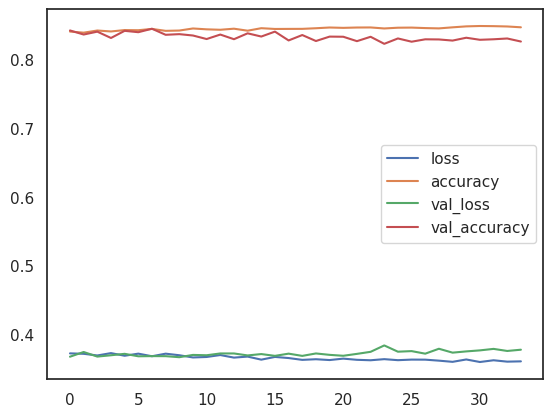

In [ ]:
loss_plot = pd.DataFrame(ann.history.history)
loss_plot.plot()

In [ ]:
#now testing for Test data
y_pred = ann.predict(X_test_smote)
y_pred = (y_pred>0.5)
acc_test_ann1 = accuracy_score(y_test_smote,y_pred)
print('ANN Accuracy: {:.2f}'.format(acc_test_ann1))
print('ANN cohen kappa score: {:.2f}'.format(cohen_kappa_score(y_test_smote, y_pred)))

628/628 [==============================] - 2s 2ms/step
ANN Accuracy: 0.83
ANN cohen kappa score: 0.65


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      9852
           1       0.84      0.82      0.83     10216

    accuracy                           0.83     20068
   macro avg       0.83      0.83      0.83     20068
weighted avg       0.83      0.83      0.83     20068



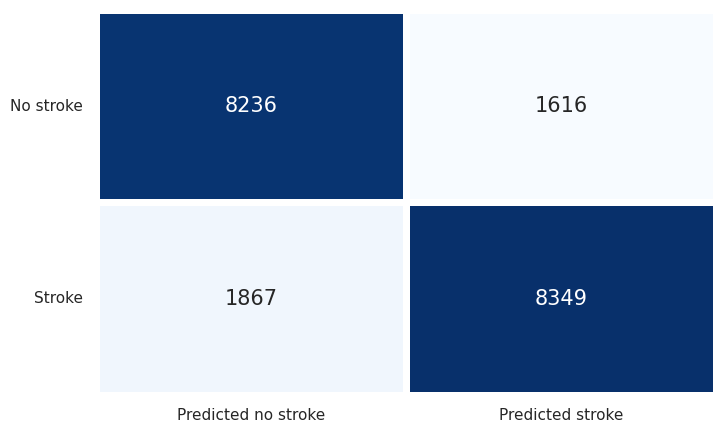

In [ ]:
print(classification_report(y_test_smote,y_pred))
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test_smote,y_pred), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

This small ANN can certainly be improved upon, by adding more layers, performing hyper-parameter tuning for activation functions, regularization, etc. 

But it's a good start!

### Final thoughts


  - After processing our data, which included imputation, label encoding, hypothesis testing, scaling, and visualizing the relationships between the variables using correlation heatmaps, distribution plots, boxplots, mosaic plots, I performed feature selection to select my best input variables which were `age`, `heart_disease`, `hypertension`, `metric_1` (which I am assuming to be sugar/glucose levels), `married` and `occupation`. 
  - Then I balanced my data using SMOTE and trained a GLM model, KNN Classifier, Random Forest classifier, XGBoost classifer and finally a 2 layer Artificial neural network.
  - The best performing model was XGBoost classifier with an accuracy of 0.93 and the GLM model (my implementation) had the best recall of 0.96
  - To imrpove the performance further, here are some things I plan to do:
    - Hyper parameter tuning for GLM and ANN
    - Using k-fold validation on GLM
    - Applying regularization techniques to KNN and RandomForest models


Overall, I am pleased with the results I have achieved and shall work on improvement in certain areas to increase the accuracy a bit more. 